#**Installed CTGAN**

#**Installed Libary**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ctgan import CTGANSynthesizer
from sdv.evaluation import evaluate
from table_evaluator import TableEvaluator
from sdv.tabular import CTGAN

import warnings

warnings.filterwarnings('ignore')

#**Define Data**

In [2]:
df = pd.read_excel('merge_EFD.xlsx')

In [3]:
df.shape

(126312, 3)

In [4]:
df_ctgan = df
df_ctgan = df_ctgan.sample(frac=0.7)

In [5]:
df_ctgan

,S.S11,S.S22,S.S12
89146,-0.141987,21.775100,-0.651551
34700,53.582800,91.778800,-1.533110
100899,47.702800,0.001553,-0.001431
55917,0.014620,34.677700,-0.006362
31694,-0.144267,35.840100,0.943496
...,...,...,...
101319,36.142200,-2.628540,-1.051220
93809,53.203300,28.502900,-9.396810
120679,63.894900,77.157600,-23.337900
78384,-0.013254,32.319700,0.061965


In [6]:
df_ctgan.shape

(88418, 3)

In [7]:
df_ctgan.dtypes

S.S11    float64
S.S22    float64
S.S12    float64
dtype: object

#**Training Model**

In [27]:
batch_size = 450
epochs = 300

model = CTGAN(batch_size=batch_size, epochs=epochs, verbose=True)
model.fit(df_ctgan)

Epoch 1, Loss G: -0.6382,Loss D:  0.1506
Epoch 2, Loss G: -1.0099,Loss D: -0.0498
Epoch 3, Loss G: -1.0608,Loss D:  0.1203
Epoch 4, Loss G: -1.1983,Loss D: -0.0235
Epoch 5, Loss G: -1.1572,Loss D: -0.1218
Epoch 6, Loss G: -1.3319,Loss D:  0.0369
Epoch 7, Loss G: -1.2944,Loss D: -0.0535
Epoch 8, Loss G: -1.1056,Loss D: -0.1671
Epoch 9, Loss G: -1.0481,Loss D: -0.1070
Epoch 10, Loss G: -0.9262,Loss D: -0.1110
Epoch 11, Loss G: -0.7721,Loss D: -0.1111
Epoch 12, Loss G: -0.8529,Loss D: -0.0630
Epoch 13, Loss G: -0.7921,Loss D: -0.2045
Epoch 14, Loss G: -0.7150,Loss D: -0.1270
Epoch 15, Loss G: -0.6247,Loss D: -0.1143
Epoch 16, Loss G: -0.6371,Loss D: -0.0301
Epoch 17, Loss G: -0.6737,Loss D: -0.0538
Epoch 18, Loss G: -0.6625,Loss D: -0.0546
Epoch 19, Loss G: -0.5724,Loss D: -0.0994
Epoch 20, Loss G: -0.5889,Loss D: -0.1512
Epoch 21, Loss G: -0.6731,Loss D:  0.0434
Epoch 22, Loss G: -0.4823,Loss D: -0.2533
Epoch 23, Loss G: -0.5852,Loss D: -0.0576
Epoch 24, Loss G: -0.4038,Loss D: -0.0834
E

#Saving Model

In [28]:
model.save('CTGAN_Model.pkl')

#**Generate sample new data**

In [29]:
n_generated_data = 37894
generated_df = model.sample(n_generated_data)

In [30]:
generated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37894 entries, 0 to 37893
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S.S11   37894 non-null  float64
 1   S.S22   37894 non-null  float64
 2   S.S12   37894 non-null  float64
dtypes: float64(3)
memory usage: 888.3 KB


In [31]:
generated_df.shape

(37894, 3)

In [32]:
generated_df

,S.S11,S.S22,S.S12
0,0.630554,32.615324,0.123442
1,0.386237,33.979184,0.162217
2,28.043094,0.197321,-0.116735
3,-0.073431,34.026196,0.430566
4,12.491896,52.526830,-1.035113
...,...,...,...
37889,70.275519,0.283888,0.152764
37890,6.332905,32.061286,7.761710
37891,0.350139,28.455941,-0.258089
37892,12.508314,40.754173,-3.271508


In [33]:
score = evaluate(generated_df, df_ctgan.sample(n_generated_data))
score

0.7217884054473785

#**Concatenate Data**

In [34]:
data = [df_ctgan, generated_df]
df_export = pd.concat(data)
df_export = df_export.reset_index(drop=True)

In [35]:
df_export

,S.S11,S.S22,S.S12
0,-0.141987,21.775100,-0.651551
1,53.582800,91.778800,-1.533110
2,47.702800,0.001553,-0.001431
3,0.014620,34.677700,-0.006362
4,-0.144267,35.840100,0.943496
...,...,...,...
126307,70.275519,0.283888,0.152764
126308,6.332905,32.061286,7.761710
126309,0.350139,28.455941,-0.258089
126310,12.508314,40.754173,-3.271508


#**Plot Original Graph**

In [36]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d 

In [37]:
#Incase got problem with matplot
#!pip install matplotlib==3.1.1

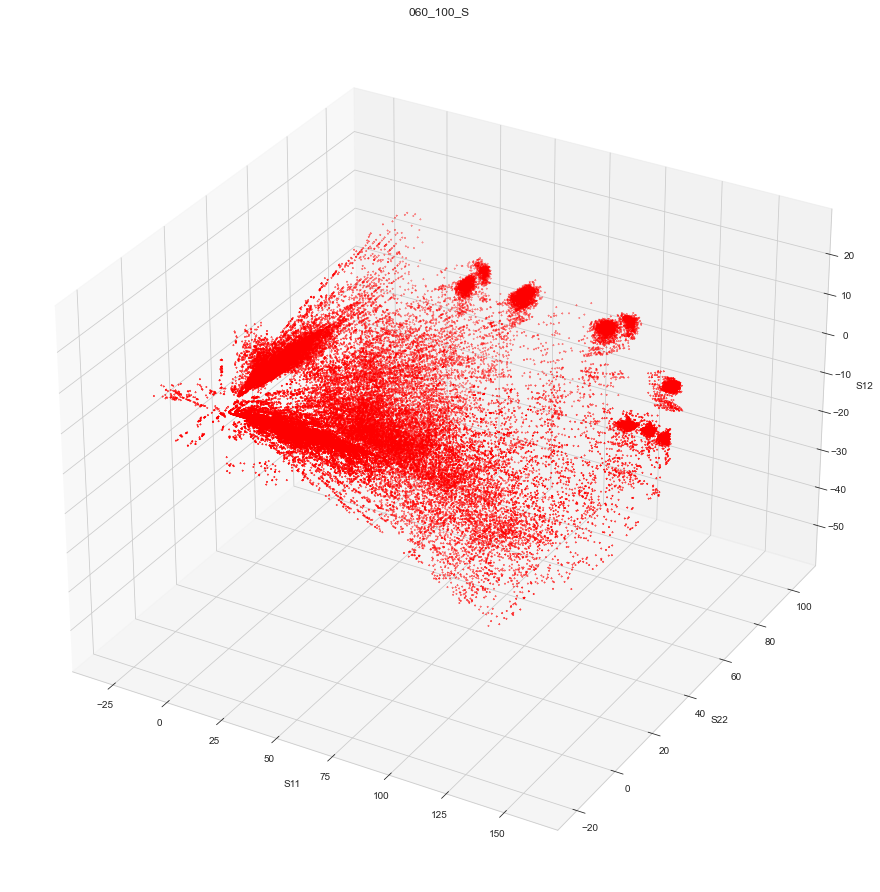

In [38]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(12,12))

ax = Axes3D(fig)


S11 = df_ctgan['S.S11']
S22 = df_ctgan['S.S22']
S12 = df_ctgan['S.S12']

ax.set_title("060_100_S") #Plot Title
ax.scatter(S11, S22, S12, marker='x', s=1, color='r')
ax.set_xlabel('S11') #X label
ax.set_ylabel('S22') #Y label
ax.set_zlabel('S12') #Z label

plt.show()

#**Plot Generated Data**

In [39]:
len(df_export)

126312

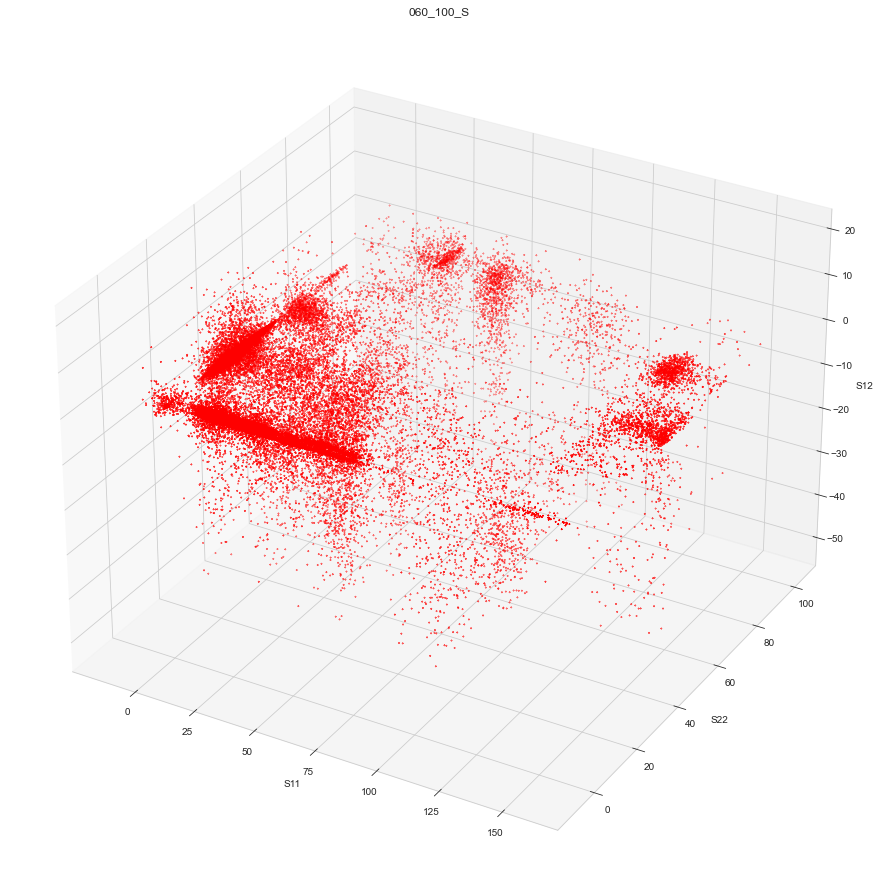

In [40]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(12,12))

ax = Axes3D(fig)


S11 = generated_df['S.S11']
S22 = generated_df['S.S22']
S12 = generated_df['S.S12']


ax.set_title("060_100_S") #Plot Title
ax.scatter(S11, S22, S12, marker='x', s=1, color='r')
ax.set_xlabel('S11') #X label
ax.set_ylabel('S22') #Y label
ax.set_zlabel('S12') #Z label

plt.show()

#**Sum Graph of Generate and Original Data**

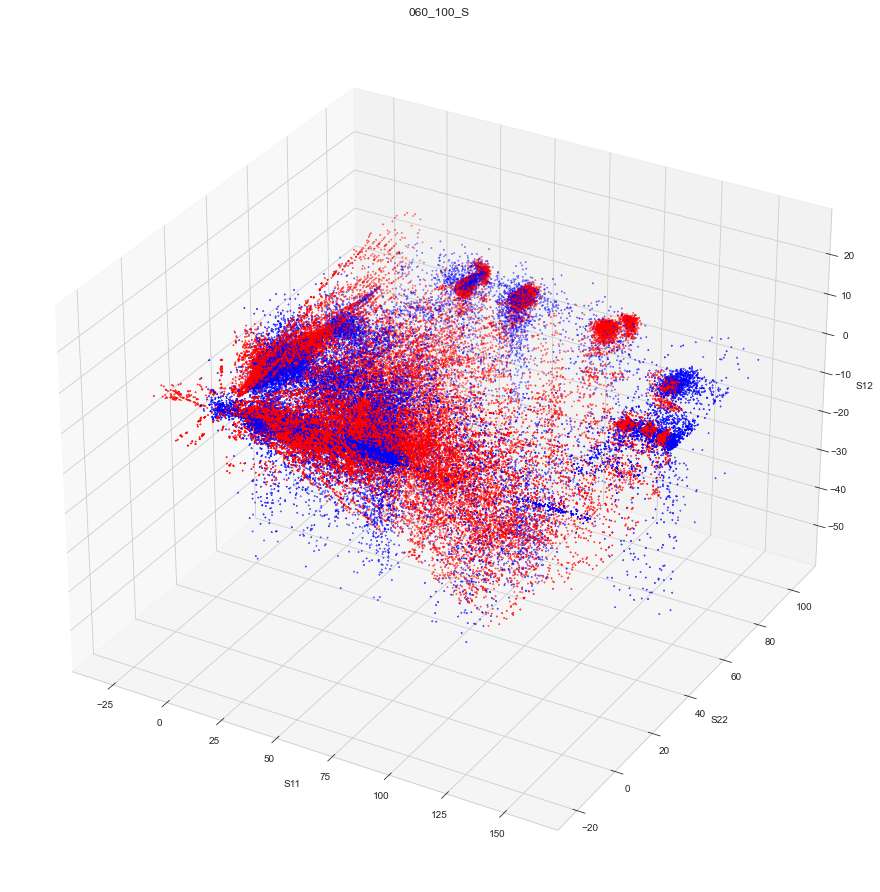

In [41]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(12,12))

ax = Axes3D(fig)

S11 = df_export['S.S11']
S22 = df_export['S.S22']
S12 = df_export['S.S12']

colors = ['red' if i < 88418 else 'blue' for i in range(126312)]

ax.set_title("060_100_S") #Plot Title
ax.scatter(S11, S22, S12, marker='x', s=1, color=colors)
ax.set_xlabel('S11') #X label
ax.set_ylabel('S22') #Y label
ax.set_zlabel('S12') #Z label

plt.show()